<a href="https://colab.research.google.com/github/mickee00000/FlowerDetection_DataAugmentation/blob/main/Flower_Detection_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
import PIL
import os
import cv2
import pathlib

In [ ]:
flower_data = tf.keras.utils.get_file('flower_photos', origin = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz', cache_dir='.', untar=True)

In [ ]:
flower_data

'./datasets/flower_photos'

In [ ]:
flower_data = pathlib.Path(flower_data)

In [ ]:
flower_data

PosixPath('datasets/flower_photos')

In [ ]:
image_count = len(list(flower_data.glob('*/*.jpg')))

In [ ]:
image_count

3670

In [ ]:
flower_values = {
    'daisy' : list(flower_data.glob('daisy/*')),
    'dandelion' : list(flower_data.glob('dandelion/*')),
    'roses' : list(flower_data.glob('roses/*')),
    'sunflowers' : list(flower_data.glob('sunflowers/*')),
    'tulips' : list(flower_data.glob('tulips/*')),
}

flower_label = {
    'daisy' : 0,
    'dandelion' : 1,
    'roses' : 2,
    'sunflowers' : 3,
    'tulips' : 4
}


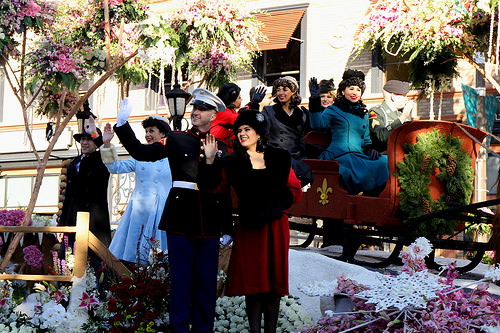

In [ ]:
PIL.Image.open(str(flower_values['roses'][0]))

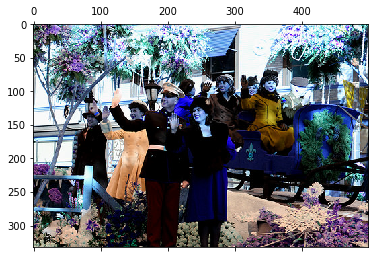

In [ ]:
plt.matshow(cv2.imread(str(flower_values['roses'][0])))

In [ ]:
X = []
y = []

In [ ]:
for flower_name , flower_list in flower_values.items():
    for flower in flower_list:
        img = cv2.imread(str(flower))
        img = cv2.resize(img, (180,180))
        X.append(img)
        y.append(flower_label[flower_name])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
X = X / 255

In [ ]:
y = keras.utils.to_categorical(y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(2752, 918, 2752, 918)

In [ ]:
simple_model = keras.Sequential([

    keras.layers.Conv2D(16,3,padding='same',activation = 'relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32,3,padding='same',activation = 'relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(63,3,padding='same',activation = 'relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),


    keras.layers.Dense(1024, activation = 'relu'),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(5, activation = 'softmax')
])

In [ ]:
simple_model.compile(
    optimizer = 'adam',
    metrics = ['accuracy'],
    loss = 'categorical_crossentropy'
)

In [ ]:
simple_model.fit(X_train, y_train, epochs = 30)

Epoch 1/30
86/86 [==============================] - 6s 29ms/step - loss: 1.3006 - accuracy: 0.4430
Epoch 2/30
86/86 [==============================] - 2s 29ms/step - loss: 0.9768 - accuracy: 0.6181
Epoch 3/30
86/86 [==============================] - 2s 29ms/step - loss: 0.7873 - accuracy: 0.7057
Epoch 4/30
86/86 [==============================] - 2s 29ms/step - loss: 0.5064 - accuracy: 0.8136
Epoch 5/30
86/86 [==============================] - 2s 28ms/step - loss: 0.2867 - accuracy: 0.9008
Epoch 6/30
86/86 [==============================] - 2s 28ms/step - loss: 0.1792 - accuracy: 0.9397
Epoch 7/30
86/86 [==============================] - 2s 28ms/step - loss: 0.0954 - accuracy: 0.9720
Epoch 8/30
86/86 [==============================] - 2s 28ms/step - loss: 0.0901 - accuracy: 0.9727
Epoch 9/30
86/86 [==============================] - 2s 28ms/step - loss: 0.0714 - accuracy: 0.9797
Epoch 10/30
86/86 [==============================] - 2s 29ms/step - loss: 0.0239 - accuracy: 0.9913
Epoch 11/

In [ ]:
simple_model.evaluate(X_test, y_test)

29/29 [==============================] - 1s 20ms/step - loss: 3.7199 - accuracy: 0.6471


[3.7199456691741943, 0.6470588445663452]

In [ ]:
y_hat = simple_model.predict(X_test)

In [ ]:
labeled_y_hat = [np.argmax(i) for i in y_hat]

In [ ]:
labeled_y_hat

[4,
 1,
 3,
 0,
 1,
 3,
 4,
 2,
 2,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 3,
 1,
 1,
 4,
 4,
 1,
 0,
 4,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 2,
 0,
 1,
 2,
 4,
 0,
 1,
 1,
 4,
 0,
 4,
 1,
 2,
 1,
 3,
 4,
 1,
 4,
 3,
 2,
 3,
 2,
 0,
 1,
 1,
 4,
 4,
 1,
 3,
 0,
 1,
 3,
 3,
 3,
 3,
 2,
 1,
 4,
 0,
 2,
 1,
 3,
 3,
 4,
 4,
 1,
 4,
 0,
 1,
 1,
 1,
 4,
 4,
 1,
 1,
 0,
 4,
 2,
 0,
 1,
 4,
 1,
 2,
 1,
 4,
 0,
 1,
 1,
 4,
 3,
 4,
 0,
 1,
 1,
 4,
 2,
 2,
 0,
 2,
 3,
 2,
 3,
 3,
 2,
 3,
 4,
 1,
 1,
 2,
 1,
 4,
 0,
 0,
 3,
 1,
 1,
 1,
 1,
 3,
 1,
 2,
 1,
 0,
 1,
 1,
 4,
 1,
 4,
 0,
 3,
 4,
 4,
 0,
 4,
 0,
 0,
 4,
 0,
 3,
 4,
 2,
 4,
 0,
 2,
 4,
 2,
 4,
 0,
 1,
 3,
 4,
 4,
 3,
 2,
 4,
 3,
 2,
 3,
 0,
 4,
 0,
 2,
 0,
 2,
 4,
 1,
 2,
 3,
 1,
 4,
 1,
 1,
 4,
 3,
 4,
 4,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 3,
 4,
 0,
 4,
 3,
 0,
 4,
 1,
 3,
 1,
 2,
 1,
 1,
 3,
 2,
 1,
 0,
 1,
 1,
 3,
 1,
 0,
 4,
 1,
 1,
 4,
 3,
 4,
 1,
 0,
 0,
 3,
 4,
 2,
 2,
 1,
 0,
 1,
 0,
 1,
 2,
 0,
 2,
 0,
 3,
 4,
 1,
 3,
 1,
 0,
 0,
 4,
 3,


In [ ]:
augmented_model = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(180, 180,3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1),
    simple_model
])

In [ ]:
augmented_model.compile(
    optimizer = 'adam',
    metrics = ['accuracy'],
    loss = 'categorical_crossentropy'
)

In [ ]:
augmented_model.fit(X_train, y_train, epochs = 30)

Epoch 1/30
86/86 [==============================] - 4s 32ms/step - loss: 1.0739 - accuracy: 0.6679
Epoch 2/30
86/86 [==============================] - 3s 32ms/step - loss: 0.6916 - accuracy: 0.7384
Epoch 3/30
86/86 [==============================] - 3s 32ms/step - loss: 0.6385 - accuracy: 0.7689
Epoch 4/30
86/86 [==============================] - 3s 32ms/step - loss: 0.5993 - accuracy: 0.7740
Epoch 5/30
86/86 [==============================] - 3s 32ms/step - loss: 0.5765 - accuracy: 0.7889
Epoch 6/30
86/86 [==============================] - 3s 31ms/step - loss: 0.5161 - accuracy: 0.8031
Epoch 7/30
86/86 [==============================] - 3s 31ms/step - loss: 0.4927 - accuracy: 0.8169
Epoch 8/30
86/86 [==============================] - 3s 32ms/step - loss: 0.4508 - accuracy: 0.8347
Epoch 9/30
86/86 [==============================] - 3s 31ms/step - loss: 0.4396 - accuracy: 0.8481
Epoch 10/30
86/86 [==============================] - 3s 31ms/step - loss: 0.4135 - accuracy: 0.8496
Epoch 11/

In [ ]:
augmented_model.evaluate(X_test, y_test)

29/29 [==============================] - 1s 16ms/step - loss: 0.9805 - accuracy: 0.7538


[0.9805454015731812, 0.7538126111030579]

In [ ]:
y_hat = augmented_model.predict(X_test)

In [ ]:
labeled_y_hat = [np.argmax(i) for i in y_hat]